# Simulation Manuscript Figures

a notebook that takes output from the simulation fitting notebook and makes the figures for the manuscript.

In [10]:
import warnings
import pprint
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import seaborn as sns

Supp Figures:
1. Simulated shift heatmaps - for default and other parameter sets run through notebook
2. recovery of beta's across sweep
3. All scatter plots of shift recovery across lasso sweep
4. if (3) doesn't show this, show how the models at low or zero lasso are incorrectly (negatively) predicting stop codon mutations
5. 2 more of the panel C figures, but for the other parameter sets

In [24]:
datadir = "output/n-shifts-10_shift-var-1.0_iter-100000_noise-0.0"

In [25]:
# load mutation
simulated_muteffects_df = pd.read_csv(f"{datadir}/simulated_muteffects.csv")
simulated_muteffects_df.round(2).head()

,mutation,beta_h1,wt_aa,site,mut_aa,shifted_site,shift,beta_h2,wt_aa_h1,wt_aa_h2,bundle_mut
0,G1A,-2.98,G,1,A,False,0.0,-2.98,G,G,False
1,G1C,-5.61,G,1,C,False,0.0,-5.61,G,G,False
2,G1D,-0.75,G,1,D,False,0.0,-0.75,G,G,False
3,G1E,-5.16,G,1,E,False,0.0,-5.16,G,G,False
4,G1F,-1.02,G,1,F,False,0.0,-1.02,G,G,False


In [26]:
simulated_muteffects_df.query("shifted_site and ~mutation.str.contains('\*')").describe()

,beta_h1,site,shift,beta_h2
count,190.000000,190.000000,190.000000,190.000000
mean,-2.548381,32.200000,0.080190,-2.468191
std,2.876622,11.751033,1.001102,3.045890
min,-14.310059,8.000000,-2.870096,-15.022011
25%,-4.743273,30.000000,-0.584806,-4.527485
50%,-1.877573,35.500000,0.107251,-2.313309
75%,-0.385589,39.000000,0.809908,0.023692
max,2.451516,48.000000,2.226159,4.311409


In [27]:
# load func scores
simulated_func_scores_df = pd.read_csv(f"{datadir}/simulated_func_scores.csv")
simulated_func_scores_df.round(2).head()

,library,homolog,aa_substitutions,func_score_type,func_score,variant_class,latent_phenotype
0,lib_1,h1,V24Q S25R H27P D29L H33C S41L C44F S47F,observed_phenotype,-5.96,>1 nonsynonymous,-11.10
1,lib_1,h1,V8P H27T P30* L49P,observed_phenotype,-5.96,stop,-11.11
2,lib_1,h1,V19P V43Q,observed_phenotype,-5.64,>1 nonsynonymous,-2.88
3,lib_1,h1,R20Y,observed_phenotype,0.01,1 nonsynonymous,5.16
4,lib_1,h1,NaN,observed_phenotype,0.00,wildtype,5.00


In [28]:
model_vs_truth_beta_shift_df = pd.read_csv(f"{datadir}/model_vs_truth_beta_shift.csv")#.astype({"scale_coeff_lasso_shift": str})
model_vs_truth_beta_shift_df["scale_coeff_lasso_shift"] = [f"{l:.1e}" for l in model_vs_truth_beta_shift_df["scale_coeff_lasso_shift"]]
# compute r^2 from corr
model_vs_truth_beta_shift_df["r2"] = model_vs_truth_beta_shift_df["corr"]**2
model_vs_truth_beta_shift_df.round(2).head()

,library,measurement_type,scale_coeff_lasso_shift,measurement_library,parameter,corr,r2
0,lib_1,observed_phenotype,0.0e+00,observed_phenotype lib_1,beta,0.87,0.76
1,lib_1,observed_phenotype,5.0e-06,observed_phenotype lib_1,beta,0.83,0.68
2,lib_1,observed_phenotype,1.0e-05,observed_phenotype lib_1,beta,0.80,0.64
3,lib_1,observed_phenotype,2.0e-05,observed_phenotype lib_1,beta,0.82,0.67
4,lib_1,observed_phenotype,4.0e-05,observed_phenotype lib_1,beta,0.85,0.72


In [29]:
library_replicate_correlation_df = pd.read_csv(f"{datadir}/library_replicate_correlation.csv")#.astype({"scale_coeff_lasso_shift": str})
library_replicate_correlation_df["scale_coeff_lasso_shift"] = [f"{l:.1e}" for l in library_replicate_correlation_df["scale_coeff_lasso_shift"]]
# comput r^2 from correlation
library_replicate_correlation_df["r2"] = library_replicate_correlation_df["correlation"]**2
library_replicate_correlation_df.round(2).tail()

,mut_param,correlation,scale_coeff_lasso_shift,measurement_type,r2
49,shift,0.65,4.0e-05,tight_bottle,0.42
50,shift,0.72,8.0e-05,tight_bottle,0.52
51,shift,0.78,1.6e-04,tight_bottle,0.61
52,shift,0.77,3.2e-04,tight_bottle,0.59
53,shift,0.56,6.4e-04,tight_bottle,0.31


In [30]:
fit_sparsity_df = pd.read_csv(f"{datadir}/fit_sparsity.csv")#.astype({"scale_coeff_lasso_shift": str})
fit_sparsity_df["scale_coeff_lasso_shift"] = [f"{l:.1e}" for l in fit_sparsity_df["scale_coeff_lasso_shift"]]
fit_sparsity_df["sparsity"] = fit_sparsity_df["sparsity"] * 100
fit_sparsity_df.round(2).head()

,dataset_name,scale_coeff_lasso_shift,mut_type,mut_param,sparsity,library,library_type,measurement_type,True Sparsity
0,lib_1_loose_bottle_func_score,0.0e+00,nonsynonymous,shift_h2,0.00,lib_1,lib_1-nonsynonymous,loose_bottle,NaN
1,lib_1_loose_bottle_func_score,0.0e+00,stop,shift_h2,0.00,lib_1,lib_1-stop,loose_bottle,NaN
2,lib_1_loose_bottle_func_score,5.0e-06,nonsynonymous,shift_h2,7.16,lib_1,lib_1-nonsynonymous,loose_bottle,NaN
3,lib_1_loose_bottle_func_score,5.0e-06,stop,shift_h2,84.00,lib_1,lib_1-stop,loose_bottle,NaN
4,lib_1_loose_bottle_func_score,1.0e-05,nonsynonymous,shift_h2,15.05,lib_1,lib_1-nonsynonymous,loose_bottle,NaN


In [31]:
cross_validation_loss_df = pd.read_csv(f"{datadir}/cross_validation_loss.csv")#.astype({"scale_coeff_lasso_shift": str})
cross_validation_loss_df["scale_coeff_lasso_shift"] = [f"{l:.1e}" for l in cross_validation_loss_df.scale_coeff_lasso_shift.values]
cross_validation_loss_df.round(2).head()

,scale_coeff_lasso_shift,library,measurement_type,dataset,loss,lib_dataset
0,0.0e+00,lib_1,observed_phenotype,training,0.0,lib_1 training
1,5.0e-06,lib_1,observed_phenotype,training,0.0,lib_1 training
2,1.0e-05,lib_1,observed_phenotype,training,0.0,lib_1 training
3,2.0e-05,lib_1,observed_phenotype,training,0.0,lib_1 training
4,4.0e-05,lib_1,observed_phenotype,training,0.0,lib_1 training


In [32]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=8):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)


In [33]:
rc_kwargs = {
    'legend.frameon': False,
    "font.size" : 11,
    "font.weight" : "normal"
}

plt.rcParams.update(**rc_kwargs)
%matplotlib inline

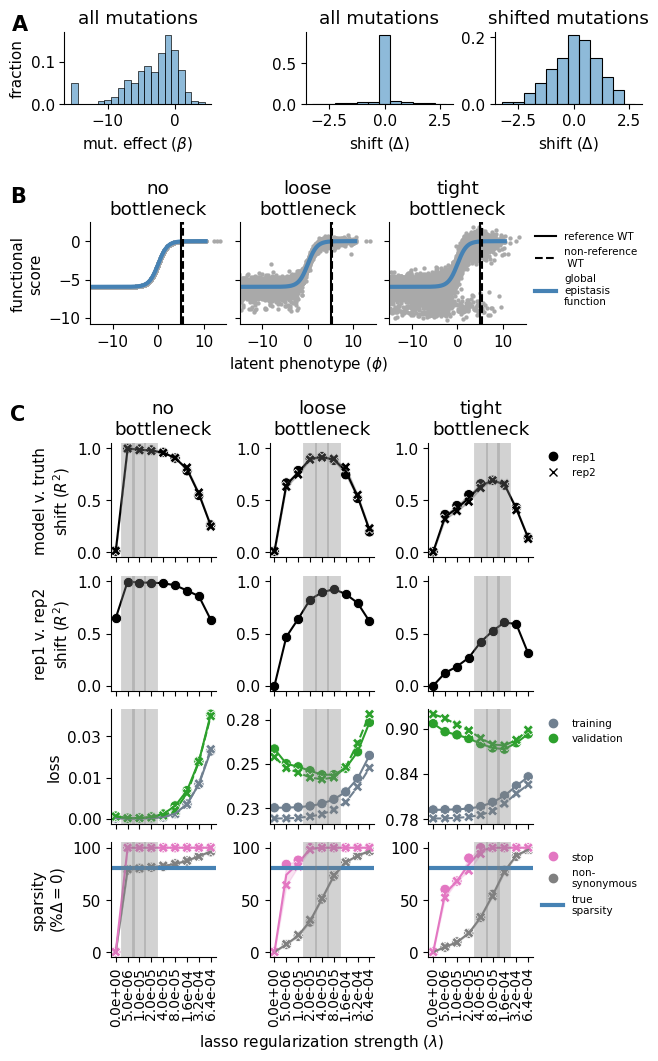

In [34]:
# Knobs 
setup = True
if setup:
    bottlenecks = {
        "observed_phenotype": "no\nbottleneck", # title
        "loose_bottle": "loose\nbottleneck",
        "tight_bottle": "tight\nbottleneck"
    }

    observed_phenotype_ylabel = "functional\nscore"
    model_truth_corr_ylabel = "model v. truth\nshift $(R^2)$"
    lib_corr_ylabel = "rep1 v. rep2\nshift $(R^2)$"
    loss_ylabel = "loss"
    sparsity_ylabel = "sparsity\n$(\%\Delta=0)$"

    # xlabels
    beta_dist = r"mut. effect $(\beta_{m})$"
    shift_dist = r"shift ($\Delta_{d,m}$)"
    latent_phenotype = "latent phenotype ($\phi$)"
    lasso_strength = f"lasso regularization strength ($\lambda$)"

    mut_type_palette={"nonsynonymous":"grey", "stop":"#E377C2"}
    dataset_palette={"training":"slategrey", "validation":"#2CA02C"}

    ref_wildtype_color = "black"
    nonref_wildtype_color = "black"    
    groundtruth_color = "steelblue"

    # x scale for latent phenotype plots
    x_scale = (-15, 15)
    point_size = 55

    # create main figure
    fig = plt.figure(layout="constrained", figsize=(6.4, 10.5))

    # create subfigures
    A, B, C = fig.subfigures(nrows=3, ncols=1, height_ratios=[0.15, 0.2, 0.65], hspace=0.05)

    # create axes
    axd_a = A.subplot_mosaic(
        [["beta_dist", "empty", "shift_dist", "shift_dist_nonzero"]],
        gridspec_kw={"width_ratios": [1, 0.3, 1, 1], "wspace": 0.05, "hspace": 0.05}
    )
    axd_b = B.subplot_mosaic(
        [["observed_phenotype_latent_measured", "loose_bottle_latent_measured", "tight_bottle_latent_measured"]],
        sharey=True 
    )
    axd_c = C.subplot_mosaic(
        [
            [f"{bottle}_shift_acc" for bottle in bottlenecks.keys()],
            [f"{bottle}_shift_rep" for bottle in bottlenecks.keys()],
            [f"{bottle}_shift_cv" for bottle in bottlenecks.keys()],
            [f"{bottle}_shift_sparse" for bottle in bottlenecks.keys()]
        ],
        sharex=True,
        gridspec_kw={"hspace": 0.05}
    )
# Add subpanel labels
axd_a["empty"].set_visible(False)

identify_ax = False
if identify_ax:
    identify_axes(axd_a)
    identify_axes(axd_b)
    identify_axes(axd_c)

# MUTATION EFFECTS
iter_ax = axd_a['beta_dist']
if True:
    sns.histplot(
        simulated_muteffects_df, 
        x="beta_h1", 
        ax=iter_ax,
        stat='probability',
        alpha=0.5,
        bins = np.arange(-15.5, 5.5, 1.0)
    )
    iter_ax.set_xlabel(r"mut. effect $(\beta)$")
    iter_ax.set_ylabel("fraction")
    iter_ax.set_title("all mutations")

# SHIFT EFFECTS
iter_ax = axd_a['shift_dist_nonzero']
if True:
    sns.histplot(
        simulated_muteffects_df.query("shifted_site and ~mutation.str.contains('\*')"), 
        x="shift", 
        ax=iter_ax,
        stat='probability',
        alpha=0.5,
        bins=np.arange(-3.25, 3.25, 0.5)
    )
    # remove y label
    iter_ax.set_ylabel(None)
    iter_ax.set_xlabel('shift ($\Delta$)')
    iter_ax.set_title("shifted mutations")

# SHIFT EFFECTS
iter_ax = axd_a['shift_dist']
if True:
    sns.histplot(
        simulated_muteffects_df, 
        x="shift", 
        ax=iter_ax,
        stat='probability',
        alpha=0.5,
        bins=np.arange(-3.25, 3.25, 0.5)
    )
    # remove y label
    iter_ax.set_ylabel(None)
    iter_ax.set_xlabel('shift ($\Delta$)')
    iter_ax.set_title("all mutations")

# ground truth line points
gt_points = (
    simulated_func_scores_df
    .query(f"func_score_type == 'observed_phenotype' and latent_phenotype > @x_scale[0] and latent_phenotype < @x_scale[1]")
    .sample(1500)
    [["latent_phenotype", "func_score"]]
    .rename(columns={"latent_phenotype": "x", "func_score": "y"})
    .sort_values("x")
)

# get the wildtyle latent phenotype
reference_wildtype_latent_phenotype = (
    simulated_func_scores_df
    .query("variant_class == 'wildtype' and homolog == 'h1'")
    .latent_phenotype
    .values[0]
)

non_reference_wildtype_latent_phenotype = (
    simulated_func_scores_df
    .query("variant_class == 'wildtype' and homolog == 'h2'")
    .latent_phenotype
    .values[0]
)

true_sparsity = (
    (len(simulated_muteffects_df.query("shift == 0")) / len(simulated_muteffects_df)) * 100
)

chosen_lassos = {
    "observed_phenotype": ["5.0e-06", "1.0e-05", "2.0e-05"],
    "loose_bottle": ["2.0e-05", "4.0e-05", "8.0e-05"],
    "tight_bottle": ["4.0e-05", "8.0e-05", "1.6e-04"]
}


# make all subplots in c
for bottleneck, name in bottlenecks.items():

    # LATENT PHENOTYPE VS FUNCTIONAL SCORE
    iter_ax = axd_b[f"{bottleneck}_latent_measured"]
    if True:
        # Plot the functional scores as a function of the latent phenotype
        sns.scatterplot(
            simulated_func_scores_df.query(f"library == 'lib_1' and func_score_type == @bottleneck").sample(8000), 
            x="latent_phenotype",
            y="func_score",
            ax=iter_ax,
            s=8,
            c="darkgrey",
            edgecolor="darkgrey"
        )

        sns.lineplot(
            data=gt_points,
            x="x",
            y="y",
            ax=iter_ax,
            color=groundtruth_color,
            linestyle="-",
            linewidth=3
        )

        # add wildtype vertical lines
        iter_ax.axvline(
            reference_wildtype_latent_phenotype,
            color=ref_wildtype_color,
        )
        iter_ax.axvline(
            non_reference_wildtype_latent_phenotype,
            color=nonref_wildtype_color,
            linestyle="--"
        )

        iter_ax.set_title(name)
        iter_ax.set_xlim(x_scale)
        if bottleneck == "observed_phenotype":
            iter_ax.set_ylabel(observed_phenotype_ylabel)

        if bottleneck == "loose_bottle":
            iter_ax.set_xlabel(latent_phenotype)
        else:
            iter_ax.set_xlabel(None)

    # SHIFT RECOVERY
    iter_ax = axd_c[f"{bottleneck}_shift_acc"]
    if True:
        # plot the shift model vs truth
        sns.scatterplot(
            (
                model_vs_truth_beta_shift_df
                .query(
                    f"measurement_type == @bottleneck and parameter == 'shift'"
                )
            ),
            x="scale_coeff_lasso_shift",
            y="r2",
            ax=iter_ax,
            style="library",
            legend=False,
            s=point_size,
            c="black"
        )

        sns.lineplot(
            (
                model_vs_truth_beta_shift_df
                .query(
                    f"measurement_type == @bottleneck and parameter == 'shift'"
                )
            ),
            x="scale_coeff_lasso_shift",
            y="r2",
            ax=iter_ax,
            legend=False,
            c="black"
        )
        iter_ax.set_title(name)
        iter_ax.set_ylim(-0.05, 1.05)
        if bottleneck == "observed_phenotype":
            iter_ax.set_ylabel(model_truth_corr_ylabel)
        else:
            iter_ax.set_ylabel(None)

    # REPLICATE SHIFT CORRELATION
    iter_ax = axd_c[f"{bottleneck}_shift_rep"]
    if True:
        sns.scatterplot(
            library_replicate_correlation_df.query(
                f"measurement_type == @bottleneck and mut_param == 'shift'"
            ),
            x="scale_coeff_lasso_shift",
            y="r2",
            ax=iter_ax,
            c = "black",
            legend=False,
            s=point_size
        )

        sns.lineplot(
            library_replicate_correlation_df.query(
                f"measurement_type == @bottleneck and mut_param == 'shift'"
            ),
            x="scale_coeff_lasso_shift",
            y="r2",
            ax=iter_ax,
            c = "black",
            legend=False 
        )
        iter_ax.set_ylim(-0.05, 1.05)
        if bottleneck == "observed_phenotype":
            iter_ax.set_ylabel(lib_corr_ylabel)
        else:
            iter_ax.set_ylabel(None)

    # SPARSENESS
    iter_ax = axd_c[f"{bottleneck}_shift_sparse"]
    if True:
        # plot the sparseness of the shift model
        sns.scatterplot(
            fit_sparsity_df.query(
                f"measurement_type == @bottleneck and mut_param == 'shift_h2'"
            ),
            x="scale_coeff_lasso_shift",
            y="sparsity",
            ax=iter_ax,
            style="library",
            legend=False,
            s=point_size,
            hue="mut_type",
            palette=mut_type_palette
        )

        sns.lineplot(
            fit_sparsity_df.query(
                f"measurement_type == @bottleneck and mut_param == 'shift_h2'"
            ),
            x="scale_coeff_lasso_shift",
            y="sparsity",
            ax=iter_ax,
            legend=False,
            hue="mut_type",
            palette=mut_type_palette
        )
        iter_ax.set_ylim(-5, 105)
        if bottleneck == "observed_phenotype":
            iter_ax.set_ylabel(sparsity_ylabel)
        else:
            iter_ax.set_ylabel(None)
        # rotate the x axis labels
        iter_ax.set_xticks(
            iter_ax.get_xticks(), 
            iter_ax.get_xticklabels(), 
            rotation=90, 
            fontsize=10
        )

        # add true sparsity line
        iter_ax.axhline(
            true_sparsity,
            color=groundtruth_color,
            linestyle="-",
            linewidth=3
        )
        if bottleneck == "loose_bottle":
            iter_ax.set_xlabel(lasso_strength)
        else:
            iter_ax.set_xlabel(None)

    # CROSS VALIDATION
    iter_ax = axd_c[f"{bottleneck}_shift_cv"]
    if True:
        # plot the cross validation loss
        sns.scatterplot(
            cross_validation_loss_df.query(
                f"measurement_type == @bottleneck"
            ),
            x="scale_coeff_lasso_shift",
            y="loss",
            ax=iter_ax,
            style="library",
            legend=False,
            s=point_size,
            hue="dataset",
            palette=dataset_palette
        )

        sns.lineplot(
            cross_validation_loss_df.query(
                f"measurement_type == @bottleneck"
            ),
            x="scale_coeff_lasso_shift",
            y="loss",
            ax=iter_ax,
            style="library",
            legend=False,
            hue="dataset",
            palette=dataset_palette
        )

        if bottleneck == "observed_phenotype":
            iter_ax.set_ylabel(loss_ylabel)
        else:
            iter_ax.set_ylabel(None)

touchup = True
if touchup:

    # add panel labels
    axd_a["beta_dist"].text(
        -0.25, 1.10, 
        f"A", 
        ha="right", va="center", 
        size=15,
        weight="bold",
        transform=axd_a["beta_dist"].transAxes
    )

    axd_b["observed_phenotype_latent_measured"].text(
        -0.47, 1.25, 
        f"B", 
        ha="right", va="center", 
        size=15,
        weight="bold",
        transform=axd_b["observed_phenotype_latent_measured"].transAxes
    )

    axd_c["observed_phenotype_shift_acc"].text(
        -0.82, 1.25, 
        f"C", 
        ha="right", va="center", 
        size=15,
        weight="bold",
        transform=axd_c["observed_phenotype_shift_acc"].transAxes
    )

    # despine all axes
    sns.despine(fig)

    # fix up y labels and ticks
    for name, ax  in axd_c.items():

        if name.endswith("shift_acc") or name.endswith("shift_rep"):
            ax.set_yticks([0.0, 0.5, 1.0])
            ax.set_yticklabels(['0.0', '0.5', '1.0'])

        elif name.endswith("shift_sparse"):
            ax.set_yticks([0, 50, 100])
            ax.set_yticklabels(['0', '50', '100'])

        else:
            # manually set ticks and labels  at 0.0, 0.5, 1.0
            # fixing xticks with FixedLocator but also using MaxNLocator to avoid cramped x-labels
            ax.yaxis.set_major_locator(mticker.MaxNLocator(3))
            ticks_loc = ax.get_yticks().tolist()
            ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            ax.set_yticklabels(['{:2.2f}'.format(x) for x in ticks_loc])

        # add a thick, and alpha=0.5 vertical line at the chossen lassos
        measurement_type = "_".join(name.split("_")[:2])
        for lasso in chosen_lassos[measurement_type]:
            ax.axvline(
                lasso,
                color="grey",
                linewidth=10,
                alpha=0.35
            )

    # add legends
    iter_ax = axd_b["tight_bottle_latent_measured"]
    black_line = mlines.Line2D(
        [], [], color=ref_wildtype_color, linestyle='-',
        markersize=5, label='reference WT'
    )

    black_dashed = mlines.Line2D(
        [], [], color=nonref_wildtype_color, linestyle='--',
        markersize=5, label='non-reference\n WT'
    )

    # blue dashed line for ground truth
    blue_dashed = mlines.Line2D(
        [], [], color=groundtruth_color, linestyle='-', linewidth=3,
        markersize=5, label='global\nepistasis\nfunction'
    )

    elements = [black_line, black_dashed, blue_dashed]
    
    iter_ax.legend(
        handles=elements, 
        bbox_to_anchor = (1.0, 1.0), 
        loc='upper left', 
        # loc='best', 
        frameon=False, 
        fontsize=7.5, 
    )

    iter_ax = axd_c["tight_bottle_shift_acc"]
    rep_1_circle = mlines.Line2D([], [], color="black", marker='o', linestyle='None',
                          markersize=6, label='rep1')
    rep_2_x = mlines.Line2D([], [], color="black", marker='x', linestyle='None',
                          markersize=6, label='rep2')
    elements = [rep_1_circle, rep_2_x]
    iter_ax.legend(
        handles=elements, 
        bbox_to_anchor = (1.0, 1.0), 
        loc='upper left', 
        frameon=False, 
        fontsize=7.5, 
    )


    iter_ax = axd_c["tight_bottle_shift_sparse"]
    stop_circle = mlines.Line2D([], [], color=mut_type_palette["stop"], marker='o', linestyle='None',
                          markersize=6, label='stop')

    nonsynon_circle = mlines.Line2D([], [], color=mut_type_palette["nonsynonymous"], marker='o', linestyle='None',
                          markersize=6, label='non-\nsynonymous')

    truth_dashed = mlines.Line2D(
        [], [], color=groundtruth_color, linestyle='-', linewidth=3,
        markersize=5, label='true\nsparsity'
    )

    elements = [stop_circle, nonsynon_circle, truth_dashed]
    iter_ax.legend(
        handles=elements, 
        bbox_to_anchor = (1.0, 1.0), 
        loc='upper left', 
        frameon=False, 
        fontsize=7.5, 
    )

    iter_ax = axd_c["tight_bottle_shift_cv"]
    training_circle = mlines.Line2D([], [], color=dataset_palette["training"], marker='o', linestyle='None',
                          markersize=6, label='training')
    validation_circle = mlines.Line2D([], [], color=dataset_palette["validation"], marker='o', linestyle='None',
                          markersize=6, label='validation')

    elements = [training_circle, validation_circle]
    iter_ax.legend(
        handles=elements, 
        bbox_to_anchor = (1.0, 1.0), 
        loc='upper left', 
        frameon=False, 
        fontsize=7.5, 
    )



save = True
if save:
    fig.savefig(f"{datadir}/main_figure.pdf", bbox_inches="tight")
    fig.savefig(f"{datadir}/main_figure.png", bbox_inches="tight")